Objective: Divide the mall target market into approachable groups.create subsets of a market based on demographics behavioral criteria to better understand the target for marketing activities.


Approcahes: 
1.perform some quick EDA
2.Use Kmeans clustering Algorithm to create our segments.
3.Use summary statistics on the clusters.
4.Visualise

Data set : Mall customers dataset.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt
from sklearn.cluster import  KMeans
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("/content/Mall_Customers copy.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#univariate analysis

In [8]:
df.describe() #all the statistical functions


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


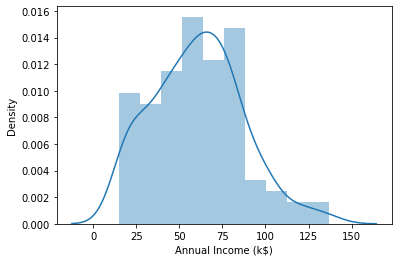

In [10]:
sns.distplot(df["Annual Income (k$)"]);

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

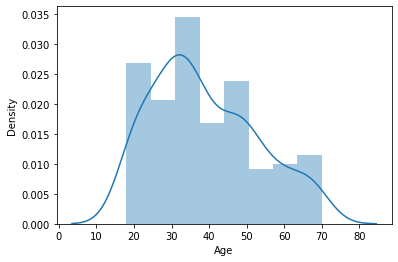

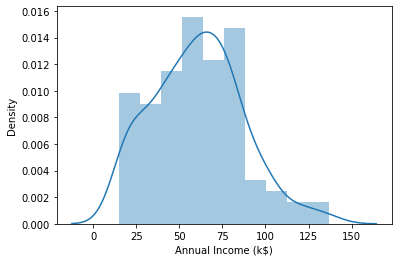

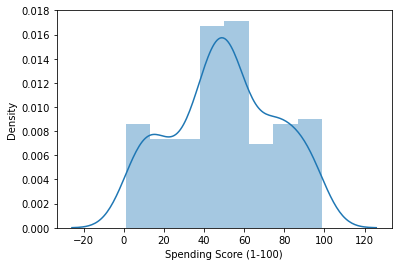

In [17]:
columns =["Age","Annual Income (k$)","Spending Score (1-100)"]
for i in columns:
  plt.figure()
  sns.distplot(df[i])

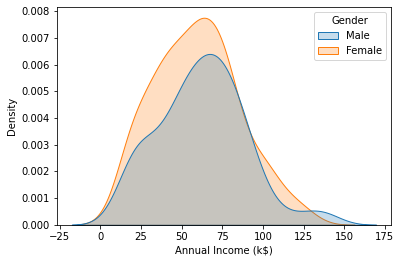

In [20]:
sns.kdeplot(df["Annual Income (k$)"],shade=True,hue=df["Gender"]);

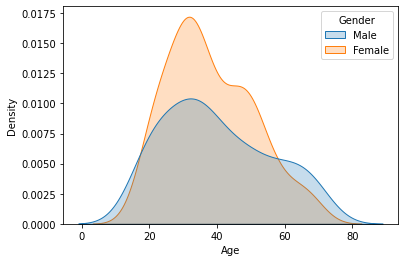

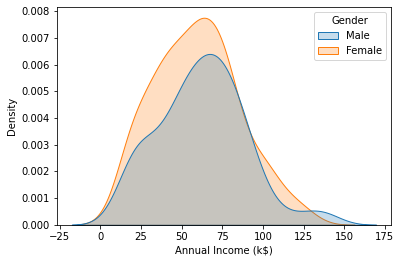

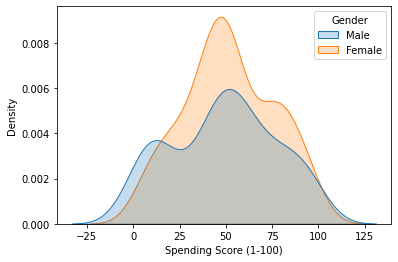

In [22]:
columns =["Age","Annual Income (k$)","Spending Score (1-100)"]
for i in columns:
  plt.figure()
  sns.kdeplot(df[i],shade=True,hue=df["Gender"])

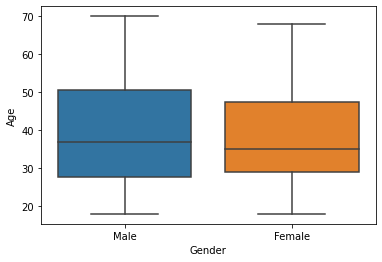

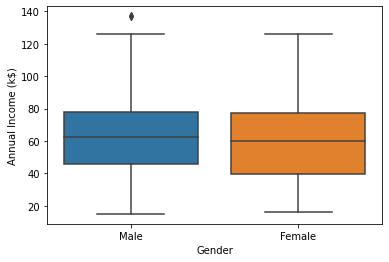

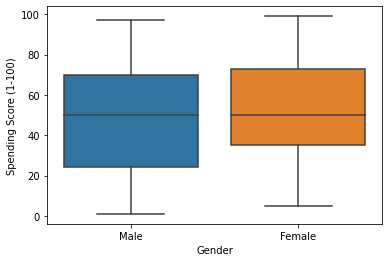

In [24]:
columns =["Age","Annual Income (k$)","Spending Score (1-100)"]
for i in columns:
  plt.figure()
  sns.boxplot(data=df,x="Gender",y=df[i])

In [25]:
df["Gender"].value_counts(normalize=True) #normalize =see in percentage

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [26]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

## **Bivariate Analysis**

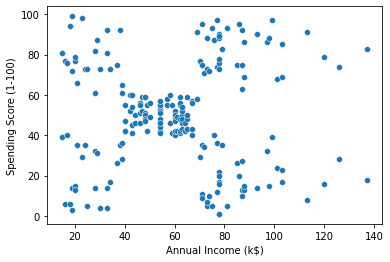

In [28]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)")

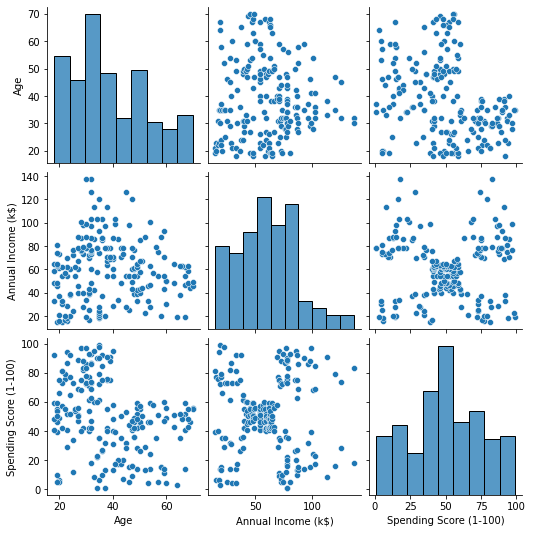

In [34]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df)

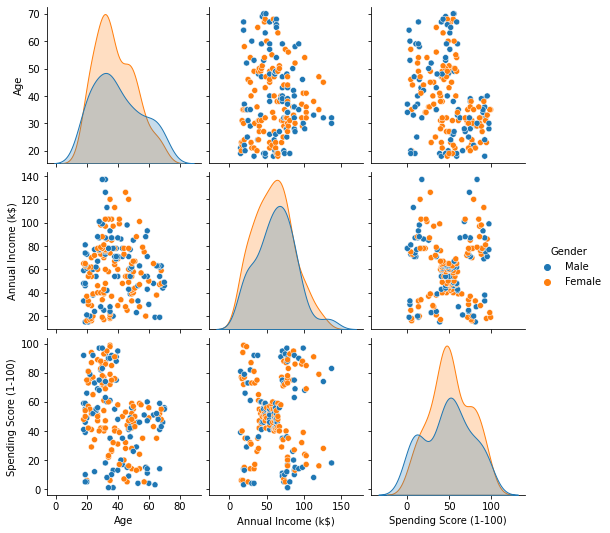

In [35]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue="Gender")

In [36]:
df.groupby(["Gender"])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [37]:
df.corr() #correlation

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


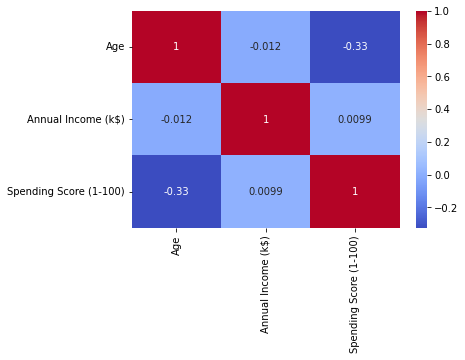

In [39]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

**KMEANS CLUSTERING= univariate,bivariate**,**multivariate**

In [82]:
from sklearn.cluster import  KMeans
n = KMeans
clf = n(n_clusters = 6)

In [84]:
clf.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [85]:
clf.labels_ # we can see all labels from zero to eight clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [86]:
df["Income Cluster"]=clf.labels_ 
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [87]:
df["Income Cluster"].value_counts() #determine how many customers belonging to each cluster

2    54
0    50
4    42
1    32
5    14
3     8
Name: Income Cluster, dtype: int64

In [109]:
clf.inertia_ # it is success metric,it gives a score,distance between centroid(elbow method)

37233.814510710006

In [114]:
inertia_scores=[]
for i in range(1,11):
  kmeans=clf
  kmeans.fit(df[["Annual Income (k$)"]])
  inertia_scores.append(kmeans.inertia_)

In [115]:
 inertia_scores

[5081.484660267268,
 5050.9047619047615,
 5050.9047619047615,
 5081.484660267268,
 5050.9047619047615,
 5050.9047619047615,
 5050.9047619047615,
 5081.484660267268,
 5050.9047619047615,
 5050.9047619047615]

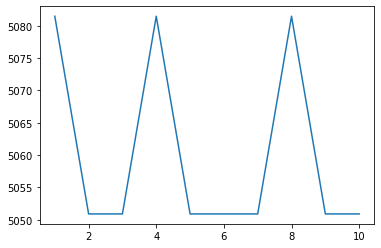

In [116]:
plt.plot(range(1,11), inertia_scores)

In [117]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'spending and income cluster'],
      dtype='object')

In [118]:
df.groupby("Income Cluster")["Age", "Annual Income (k$)", "Spending Score (1-100)"].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.520000,60.440000,50.060000
1,34.906250,22.000000,49.656250
2,36.018519,78.370370,49.555556
3,36.500000,124.000000,49.625000
4,43.000000,42.238095,50.666667
5,38.142857,99.142857,53.357143


bivariate 

In [143]:
n = KMeans
clf2= n(n_clusters = 6)

In [144]:
clf2.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
clf2.labels_
df["spending and income cluster"]=clf2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spending and income cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,4
2,Female,20,16,6,1,0
3,Female,23,16,77,1,4
4,Female,31,17,40,1,0


In [145]:
clf2.inertia_

37265.86520484346

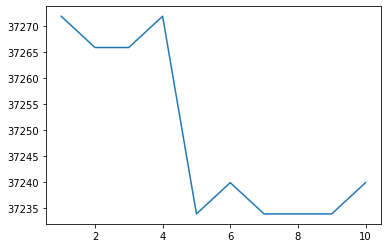

In [146]:
inertia_scores2=[]
for i in range(1,11):
  kmeans=clf2
  kmeans.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
  inertia_scores2.append(kmeans.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [159]:
centers=pd.DataFrame(clf2.cluster_centers_)
centers.columns=["x","y"]

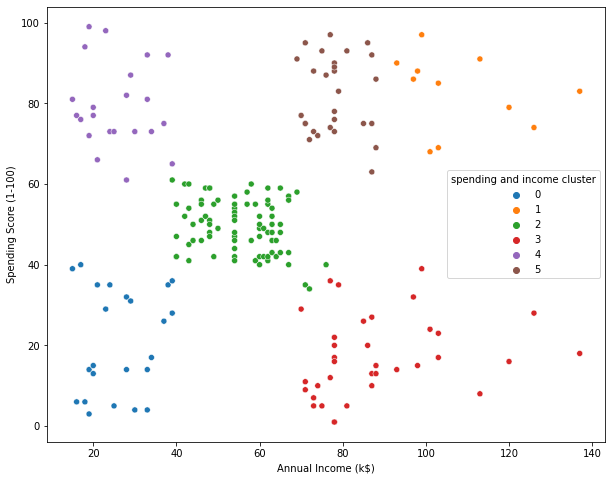

In [162]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="spending and income cluster",palette="tab10")

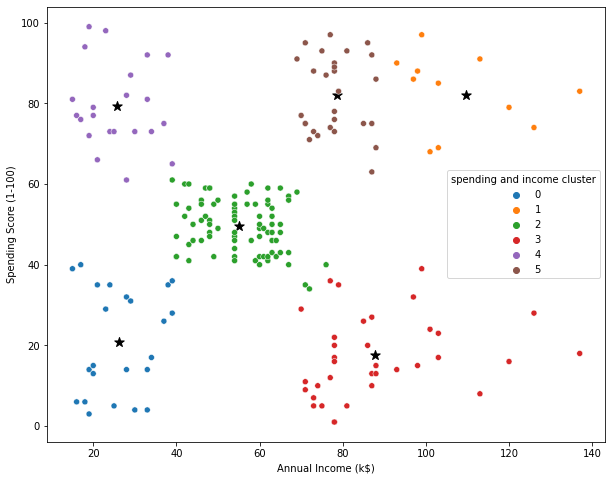

In [185]:
plt.figure(figsize=(10,8))
plt.scatter (x=centers["x"],y=centers["y"],s=100,c="black",marker="*")

sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="spending and income cluster",palette="tab10")
plt.savefig("clustering_bivariate.png")

In [163]:
pd.crosstab(df["spending and income cluster"],df["Gender"])

Gender,Female,Male
spending and income cluster,,
0,14,9
1,6,5
2,48,33
3,16,19
4,13,9
5,15,13


In [164]:
pd.crosstab(df["spending and income cluster"],df["Gender"],normalize="index")

Gender,Female,Male
spending and income cluster,,
0,0.608696,0.391304
1,0.545455,0.454545
2,0.592593,0.407407
3,0.457143,0.542857
4,0.590909,0.409091
5,0.535714,0.464286


In [165]:
df.groupby("spending and income cluster")["Age", "Annual Income (k$)", "Spending Score (1-100)"].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending and income cluster,,,
0,45.217391,26.304348,20.913043
1,32.454545,108.181818,82.727273
2,42.716049,55.296296,49.518519
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636
5,32.785714,78.035714,81.892857


Multivariate

In [166]:
from sklearn.preprocessing import StandardScaler

In [168]:
scale=StandardScaler()

In [169]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spending and income cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,4
2,Female,20,16,6,1,0
3,Female,23,16,77,1,4
4,Female,31,17,40,1,0


In [170]:
dff=pd.get_dummies(df) #converted all strings to numbers
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spending and income cluster,Gender_Female,Gender_Male
0,19,15,39,1,0,0,1
1,21,15,81,1,4,0,1
2,20,16,6,1,0,1,0
3,23,16,77,1,4,1,0
4,31,17,40,1,0,1,0


In [171]:
dff=pd.get_dummies(df,drop_first=True) 
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spending and income cluster,Gender_Male
0,19,15,39,1,0,1
1,21,15,81,1,4,1
2,20,16,6,1,0,0
3,23,16,77,1,4,0
4,31,17,40,1,0,0


In [172]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'spending and income cluster', 'Gender_Male'],
      dtype='object')

In [174]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [175]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [180]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


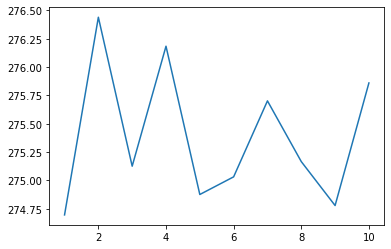

In [181]:
inertia_scores3=[]
for i in range(1,11):
  kmeans=clf2
  kmeans.fit(dff)
  inertia_scores3.append(kmeans.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [182]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spending and income cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,4
2,Female,20,16,6,1,0
3,Female,23,16,77,1,4
4,Female,31,17,40,1,0
...,...,...,...,...,...,...
195,Female,35,120,79,3,1
196,Female,45,126,28,3,3
197,Male,32,126,74,3,1
198,Male,32,137,18,3,3


In [183]:
df.to_csv("clustering.csv")



conclusion:


*  cluster one ,which has a high spending score and high income.
*   54 percentage of cluster 1 shoppers are women.


*  we should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster. 
*   cluster 2 represents an interesting opportunity to market to the customers for sales event on popular items.




